In [1]:
import numpy as np
import requests
import matplotlib.pyplot as plt

In [15]:
# uʍop ǝpᴉsdn ʞuᴉɥʇ ʇsnꓩ



input_data = np.random.uniform(0, 1, (1, 32, 32, 1)).tolist()
# 1024 IMAGES WITH ONE WHITE PIXEL EACH
x = np.ones((32*32,32,32,1))*0.4
for r in range(32):
    for c in range(32):
        x[r*32+c,r,c,0] = 1
print('Submission shape:',x[1:2,:,:,:].shape)

print(x[0:1,:,:,:])
print(x[1:2,:,:,:])


def query(input_data):
    response = requests.post('http://inversion.advml.com/score', json={'data': input_data})
    return response.json()

print(np.array(query(input_data)['outputs']).shape)

Submission shape: (1, 32, 32, 1)
[[[[1. ]
   [0.4]
   [0.4]
   ...
   [0.4]
   [0.4]
   [0.4]]

  [[0.4]
   [0.4]
   [0.4]
   ...
   [0.4]
   [0.4]
   [0.4]]

  [[0.4]
   [0.4]
   [0.4]
   ...
   [0.4]
   [0.4]
   [0.4]]

  ...

  [[0.4]
   [0.4]
   [0.4]
   ...
   [0.4]
   [0.4]
   [0.4]]

  [[0.4]
   [0.4]
   [0.4]
   ...
   [0.4]
   [0.4]
   [0.4]]

  [[0.4]
   [0.4]
   [0.4]
   ...
   [0.4]
   [0.4]
   [0.4]]]]
[[[[0.4]
   [1. ]
   [0.4]
   ...
   [0.4]
   [0.4]
   [0.4]]

  [[0.4]
   [0.4]
   [0.4]
   ...
   [0.4]
   [0.4]
   [0.4]]

  [[0.4]
   [0.4]
   [0.4]
   ...
   [0.4]
   [0.4]
   [0.4]]

  ...

  [[0.4]
   [0.4]
   [0.4]
   ...
   [0.4]
   [0.4]
   [0.4]]

  [[0.4]
   [0.4]
   [0.4]
   ...
   [0.4]
   [0.4]
   [0.4]]

  [[0.4]
   [0.4]
   [0.4]
   ...
   [0.4]
   [0.4]
   [0.4]]]]
(1, 8)


In [34]:
x = np.ones((32*32,32,32,1))*0.4
for r in range(32):
    for c in range(32):
        x[r*32+c,r,c,0] = 1
# print('Submission shape:',x[1:2,:,:,:].shape)

for i in range(1024):
    if i == 0:
        s = np.array(query(x[i:i+1,:,:,:].tolist())['outputs'])
    else:
        s = np.concatenate((s, np.array(query(x[i:i+1,:,:,:].tolist())['outputs'])), axis=0)

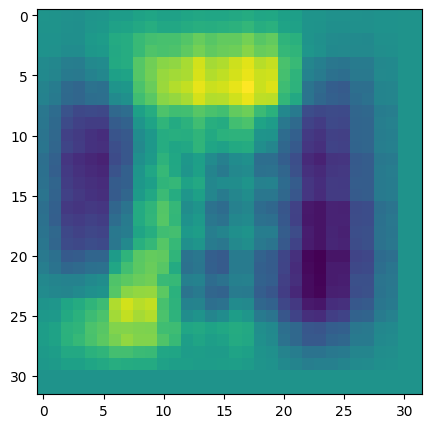

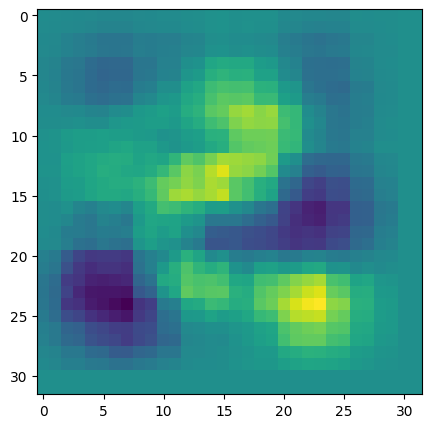

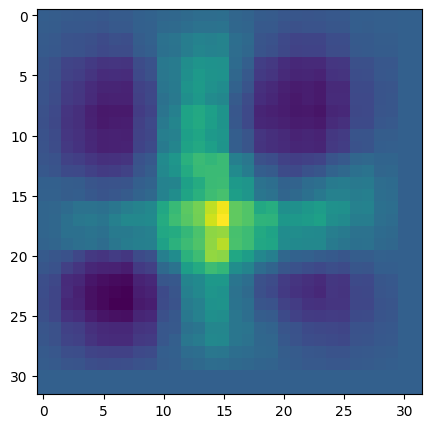

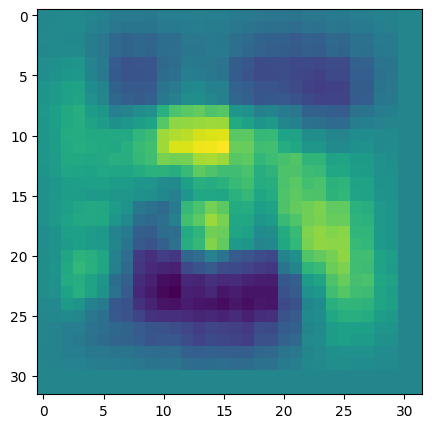

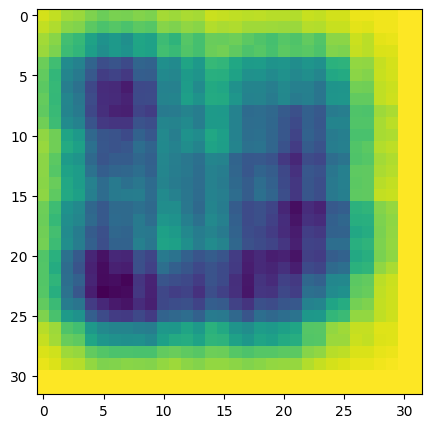

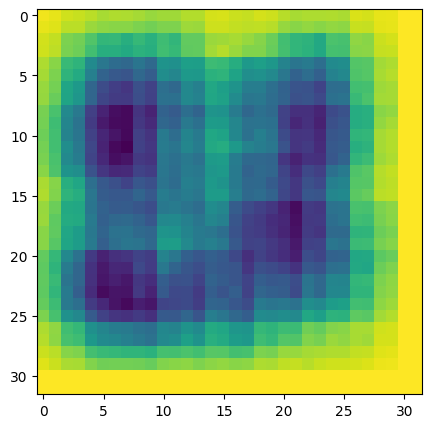

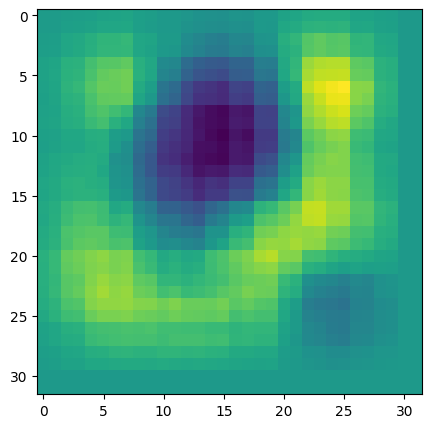

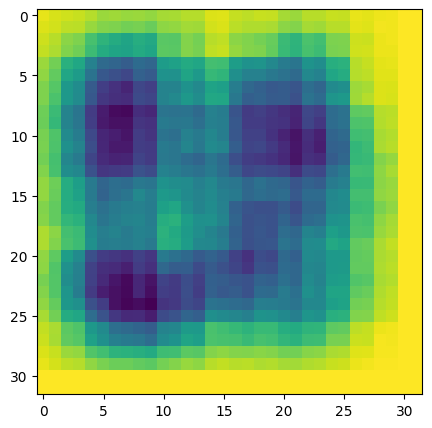

In [41]:
# PLOT RESULT
# plt.figure(figsize=(20,5))
for col in range(8):
    img = np.zeros((32,32))
    for k in range(32*32):
        r = k//32; c = k%32
        img[r,c] = s[k,col]
    plt.figure(figsize=(5,5))
    plt.imshow(img, cmap='viridis')
    plt.show()

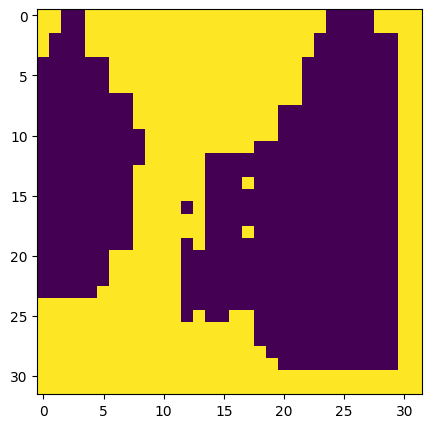

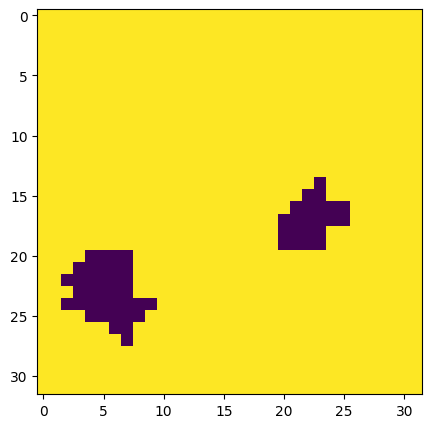

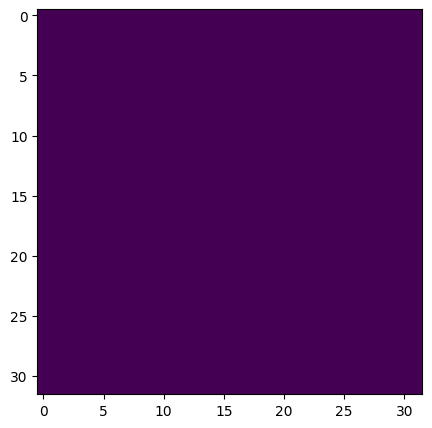

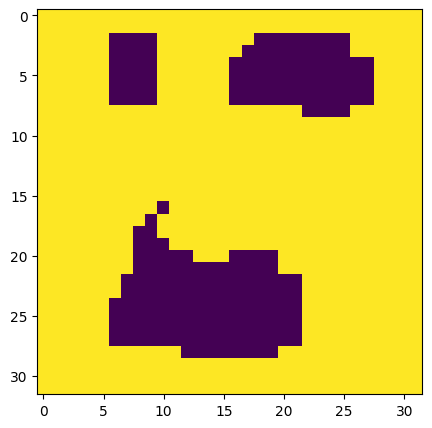

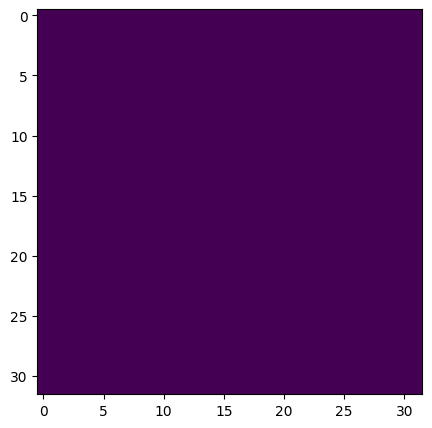

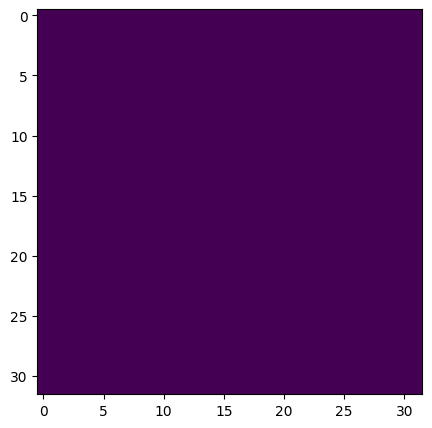

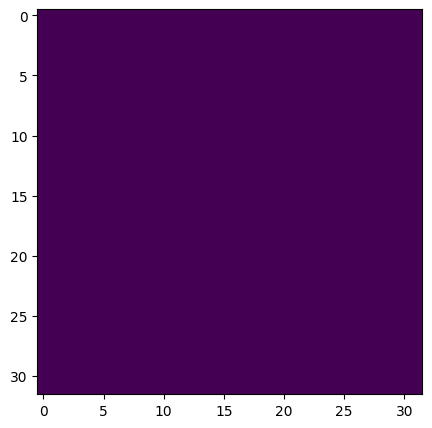

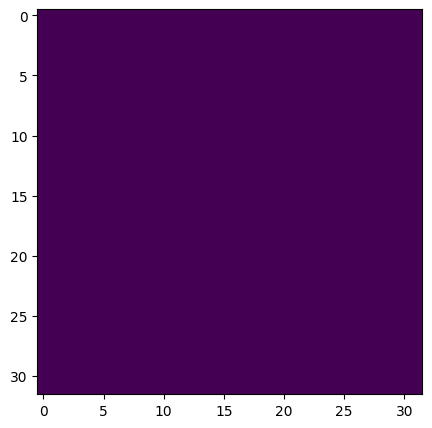

In [39]:
for col in range(8):
    img = np.zeros((32,32))
    for k in range(32*32):
        r = k//32; c = k%32
#         img[r,c] = s[k,col]
        if s[k,col] < 0.17:
            img[r,c] = 0.0
        else:
            img[r,c] = 1.0
    plt.figure(figsize=(20,5))
    plt.imshow(img, cmap='viridis')
    plt.show()

In [18]:
s = np.array(query(x[0:1,:,:,:].tolist())['outputs'])
y = np.array(query(x[1:2,:,:,:].tolist())['outputs'])

s = np.concatenate((s, y), axis=0)

print(s)
print(s.shape)

[[1.71344459e-01 2.33855933e-01 3.91990179e-03 1.93326578e-01
  2.75730212e-08 3.54742156e-08 3.97553027e-01 5.31724709e-08]
 [1.71114624e-01 2.32880518e-01 3.88151174e-03 1.93898976e-01
  2.72500973e-08 3.52456198e-08 3.98224294e-01 5.26941619e-08]]
(2, 8)


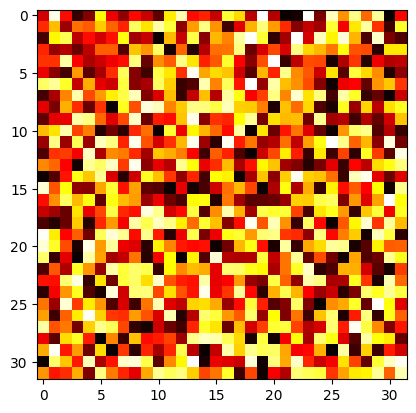

In [23]:
input_data = np.random.uniform(0, 1, (1, 32, 32, 1))
plt.imshow(input_data[0,:,:,0], cmap='hot')

In [ ]:
import requests

# When you believe you have the static flag, submit it here

static_flag = 'unknown to us'
def get_flag(input_data):
    response = requests.post('http://inversion.advml.com/score', json={'flag': input_data})
    return response.json()

get_flag(static_flag)

In [ ]:
# PLOT RESULT
plt.figure(figsize=(20,5))
for col in range(6):
    img = np.zeros((32,32))
    for k in range(32*32):
        r = k//32; c = k%32
        img[r,c] = x[k,col]
    plt.subplot(1,6,col+1)
    plt.imshow(img)
plt.show()